# Исследование объявлений о продаже квартир

**Описание проекта:**

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. **Нам необходимо провести исследовательский анализ данных, который поможет установить параметры, влияющие на цену объектов.** Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**План проекта:**

1. [Загрузка и описание данных](#Загрузка-и-описание-данных)
2. [Предобработка данных](#Предобработка-данных)
    1. [Устранение пропусков](#Устранение-пропусков)
    2. [Изменение типов данных](#Изменение-типов-данных)
    3. [Обработка дубликатов](#Обработка-дубликатов)
    4. [Устранение аномальных значений](#Устранение-аномальных-значений)
    5. [Добавление новых столбцов](#Добавление-новых-столбцов)
    6. [Вывод](#Вывод)
3. [Исследовательский анализ данных](#Исследовательский-анализ-данных)
    1. [Описание параметров квартир](#Описание-параметров-квартир)
    2. [Скорость продажи квартир](#Скорость-продажи-квартир)
    3. [Взаимосвязь между стоимостью квартиры и ее параметрами](#Взаимосвязь-между-стоимостью-квартиры-и-ее-параметрами)
    4. [Расчет средних цен за метр в разных населенных пунктах](#Расчет-средних-цен-за-метр-в-разных-населенных-пунктах)
    5. [Зависимость стоимости квартиры от удаленности к центру в Санкт-Петербурге](#Зависимость-стоимости-квартиры-от-удаленности-к-центру-в-Санкт-Петербурге)
4. [Общий вывод](#Общий-вывод)

**Описание данных:**
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — общая площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

## Загрузка и описание данных

In [1]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt 
import warnings

warnings.filterwarnings("ignore")

pd.options.display.float_format ='{:,.2f}'.format

plt.rcParams["figure.figsize"] = (10,5)

In [2]:
# Загружаем датасет
data = pd.read_csv(r'C:\Users\ivank\practicum\datasets\real_estate_data.csv', sep='\t')

In [3]:
display(data.head())
data.info()
data.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.00","23,699.00","23,699.00","23,699.00","14,504.00","23,613.00","21,796.00","23,699.00","21,421.00","12,180.00","18,157.00","18,180.00","18,181.00","8,079.00","18,181.00","9,110.00","20,518.00"
mean,9.86,"6,541,548.77",60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,"28,793.67","14,191.28",0.61,490.80,0.77,517.98,180.89
std,5.68,"10,887,013.27",35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,"12,630.88","8,608.39",0.80,342.32,0.94,277.72,219.73
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,"3,400,000.00",40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,"18,585.00","9,238.00",0.00,288.00,0.00,294.00,45.00
50%,9.00,"4,650,000.00",52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,"26,726.00","13,098.50",0.00,455.00,1.00,502.00,95.00
75%,14.00,"6,800,000.00",69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,"37,273.00","16,293.00",1.00,612.00,1.00,729.00,232.00
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00"


Таблица состоит их 23699 строк и 22 столбцов: 

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — общая площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

Изучив информацию о датафрейме, можно сказать, что в некоторых столбцах присутствуют пропуски. Также изучив названия столбцов, можно предположить, что для них был определен неверный тип данных.

В стобцах также присутствуют аномальные данные, к примеру, минимальная цена за объект - 12,190 рублей, количество комнат - 19, высота потолков - 100 и тд.

[Начало страницы](#Исследование-объявлений-о-продаже-квартир)

## Предобработка данных

### Устранение пропусков

In [4]:
# Считаем количество пропусков
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


Судя по данным, всего в нескольких столбцах нет пропусков. В столбцах `is_apartment`, `balcony`, `parks_nearest`, `ponds_nearest` пропуски и вовсе составляют половину или более половины данных всего столбца. Также пропуски присутствуют в ключевых для данных столбцах, например `living_area`, `kitchen_area`. 

Заполним пропуски в данных, где это возможно.

In [5]:
# Заполняем высоту потолков медианой
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
    
# Заполняем жилую площадь медианой, учитывая количество комнат в квартире
data['living_area'] = data.groupby('rooms')['living_area'].apply(lambda s: s.fillna(s.median()))

data['is_apartment'] = data['is_apartment'].fillna(True)

# Заполняем площадь кухни медианой, учитывая количество комнат в квартире
data['kitchen_area'] = data.groupby('rooms')['kitchen_area'].apply(lambda s: s.fillna(s.median()))

# Если продавец не указал число балконов, то, скорее всего, в его квартире их нет, поэтому заполняем пропуски нулем
data['balcony'] = data['balcony'].fillna(0)

data.dropna(subset=['locality_name'], inplace=True)

data.dropna(subset=['floors_total'], inplace=True)

data = data.reset_index(drop=True)

# Проверяем количество пропусков
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              194
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64


Теперь пропуски остались в основном в столбцах с картографическими данными. Причиной появления пропусков могли стать человеческий или технический факторы. Странными выглядят пропуски в данных, связанных с жилой площадью, площадью кухни и высотой потолка, поскольку это одни из важнейших критериев при выборе квартиры. В первых двух случаях пропусков оказалось не так много, можно предположить, что они были вызваны техническим фактором, однако пропусков в столбце с высотой полотка оказалось куда больше, почти половина. Вероятно, эти данные просто не были введены продавцами, как и данные о ближайших парках, водоёмах, расстоянии до центра города и аэропорта.

Также, поскольку данные о количестве этажей в доме и наименование города невозможно восстановить, строки, где отсутствовали эти данные, пришлось удалить.

### Изменение типов данных

Необходимо изменить типы данных в столбцах, где они указаны неверно.

In [6]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['is_apartment'] = data['is_apartment'].astype('bool')
data['balcony'] = data['balcony'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')

In [7]:
# Проверяем типы данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int32         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23371 non-null  float64       
 13  balcony         

Изменены типы данных в столбцах `first_day_exposition`,  `is_apartment`, `floors_total` и `balcony`. В первом столбце содержится информация о дате публикации объявления, во втором булевы значения об апартаментах, в следующих - количество балконов в квартире и этажность дома. Поскольку в этих столбцах не может быть дробное число, тип данных переобразован в целое.
Не удалось изменить тип данных в столбце `days_exposition`, поскольку в нем все еще остались пропуски.

### Обработка дубликатов

Проверим датасет на наличие дубликатов.

In [8]:
print('Количество дубликатов:', data.duplicated().sum())

Количество дубликатов: 0


Явных дубликатов в таблице нет. Однако, в столбце с наименованием города могут быть скрытые дубликаты.

In [9]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

В столбце очень много обозначений населенных пунктов, которые также повторяются между собой. Создадим список определенных слов, которые можно убрать из названия городов.

In [10]:
# Создаем список
garbage = [
    'деревня',
    'городского типа',
    'железнодорожной',
    'городской',
    'посёлок',
    'поселок',
    'село',
    'коттеджный',
    'станции',
    'при',
    'некоммерческое'
]
 
# Удаляем слова из списка
for value in garbage:
    data['locality_name'] = data['locality_name'].str.replace(value, '').str.strip()

In [11]:
# Проверяем количество уникальных названий
data['locality_name'].sort_values().unique()

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жил', 'Жилгородок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара', 'Ильи

Неявные дубликаты были устранены и теперь расположение квартиры определяется одним названием населенного пункта. Уникальных названий стало в разы меньше.

### Устранение аномальных значений

Ранее мы видели выбивающиеся значения в нескольких столбцах. Начнем со столбца с высотой потолков.

In [12]:
# Выводим максимальные значения в столбце
data['ceiling_height'].sort_values(ascending=False).head()

22739   100.00
3134     32.00
22211    32.00
21256    27.50
5777     27.00
Name: ceiling_height, dtype: float64

Высота потолков в 27 и более метров выглядит подозрительно. Скорее всего, была выбрана неверная метрика и реальная величина в 10 раз меньше указанной. Так как высота не может быть меньше 2.5 метров ,а с учетом отклонений и погрешностей при строительстве может составлять 2.4 метра, возьмем эту минимальную величину для устранения аномальных значений. Также устраним значения, превышающие высоту в 5 метров.

In [13]:
# В 10 раз уменьшаем высоту потолков от 24м
data.loc[data['ceiling_height'] >= 24, 'ceiling_height'] = data.loc[data['ceiling_height'] >= 24, 'ceiling_height']/10

Теперь проверим сколько строк осталось в датасете, которые выходят за установленные нами значения в минимальные 2.4 и максимальные 5 метров.

In [14]:
print('Количество строк с данными о высоте потолка ниже 2.4 метра и выше 5 метров:', 
      data.loc[(data['ceiling_height'] > 5) | (data['ceiling_height'] < 2.4), 'ceiling_height'].count())

Количество строк с данными о высоте потолка ниже 2.4 метра и выше 5 метров: 37


Данные строки можно удалить.

In [15]:
data = data[(data['ceiling_height'] < 5) & (data['ceiling_height'] > 2.4)].reset_index(drop=True)

# Проверяем значения в столбце с высотой потолков
print(data['ceiling_height'].describe())

count   23,503.00
mean         2.70
std          0.21
min          2.45
25%          2.60
50%          2.65
75%          2.70
max          4.90
Name: ceiling_height, dtype: float64


Столбец с высотой потолков обработан, остались логичные границы потолков.

Далее проверим столбец с этажностью домов.

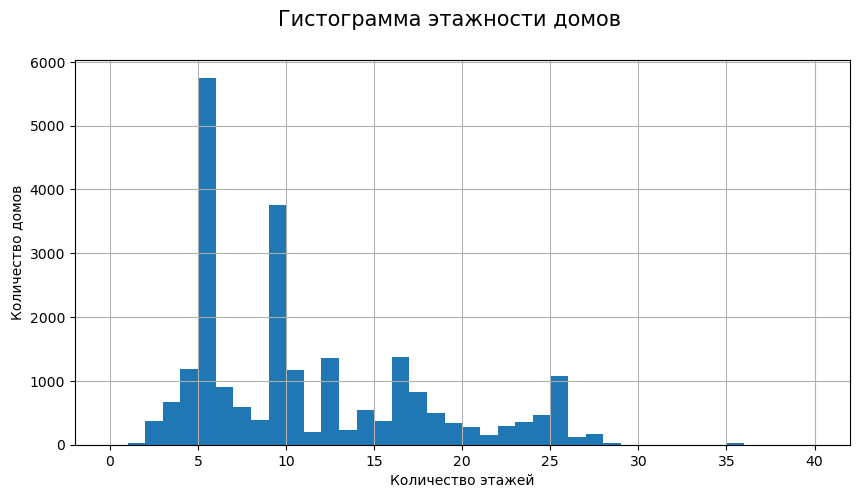

In [16]:
data['floors_total'].hist(bins=40, range=(0,40))
plt.suptitle('Гистограмма этажности домов', fontsize = 15)
plt.xlabel('Количество этажей')
plt.ylabel('Количество домов')
plt.show()

По графику видно, что самые распространенные дома 5-ти и 9-ти этажные. Также есть дома с этажностью более 20, вероятно это новостройки. Домов с количеством этажей более 30 довольно мало, посмотрим сколько.

In [17]:
print('Количество домов с этажностью менее 1 этажа:',
      data.loc[data['floors_total'] < 1, 'floors_total'].count())
print('Количество домов с этажностью более 30 этажей:',
      data.loc[data['floors_total'] > 30, 'floors_total'].count())
data['floors_total'].describe()

Количество домов с этажностью менее 1 этажа: 0
Количество домов с этажностью более 30 этажей: 31


count   23,503.00
mean        10.68
std          6.60
min          1.00
25%          5.00
50%          9.00
75%         16.00
max         60.00
Name: floors_total, dtype: float64

В целом данные выглядят корректно, однако можно увидеть выбросы после 30-го этажа. Таких выбивающихся значений не очень много, так что их удаление не должно повлиять на общую картину данных.

In [18]:
data = data.query('floors_total <= 30').reset_index(drop=True)

Далее устраним выбивающиеся значения в стоимости квартир.

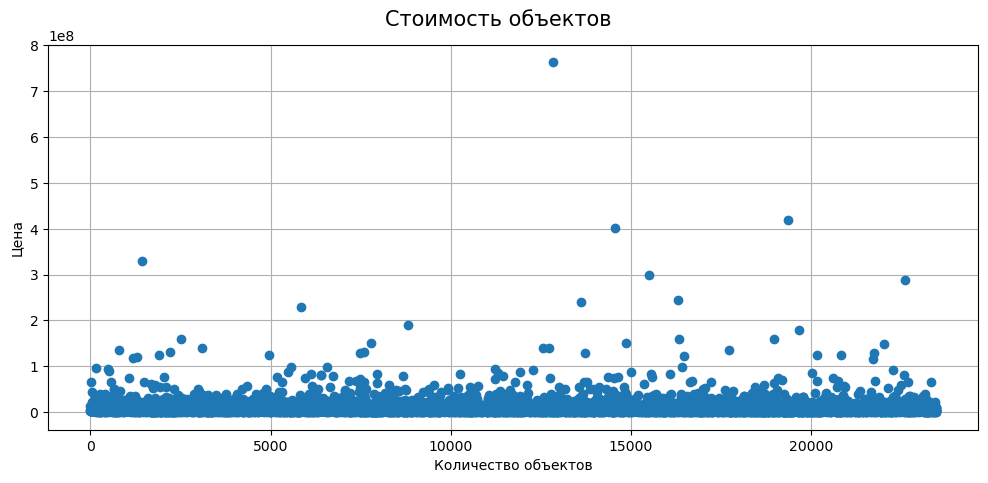

In [19]:
data.plot(y='last_price', style='o', grid=True, figsize=(12, 5), legend='')
plt.suptitle('Стоимость объектов', y = 0.95, fontsize = 15)
plt.xlabel('Количество объектов')
plt.ylabel('Цена')
plt.show()

In [20]:
print(data['last_price'].describe())

count        23,472.00
mean      6,528,862.61
std      10,848,356.77
min          12,190.00
25%       3,403,750.00
50%       4,650,000.00
75%       6,790,000.00
max     763,000,000.00
Name: last_price, dtype: float64


Основная масса квартир находится в ценовом диапозоне до 6 млн. рублей. Есть выбросы, превышающие 100 млн. вплоть почти до 800 млн. Эти данные могут сильно искажать всю картину, так что от них лучше избавиться. Но также настараживает минимальная цена квартиры - 12 тыс. рублей и концентрация значений на графике около нуля.

In [21]:
# Удаляем выбросы
data = data.loc[(data['last_price'] > 400000) & (data['last_price']<20000000)].reset_index(drop=True)
data['last_price'].describe()

count       22,756.00
mean     5,410,474.84
std      3,194,713.22
min        430,000.00
25%      3,400,000.00
50%      4,550,000.00
75%      6,500,000.00
max     19,999,000.00
Name: last_price, dtype: float64

Итак, была удалена строка с квартирой со стоимостью в 12 тысяч рублей и квартиры дороже 20 млн.

Рассмотрим сколько комнат бывает в квартирах.

In [22]:
data['rooms'].describe()

count   22,756.00
mean         2.01
std          0.99
min          0.00
25%          1.00
50%          2.00
75%          3.00
max         11.00
Name: rooms, dtype: float64

В столбце есть значения с 0 комнатами в квартире. Можно предположить, что так отоброжаются квартиры-студии и квартиры с открытыми планировками.

In [23]:
data.loc[(data['rooms'] == 0) & (data['open_plan'] == False), 'studio'].agg(['count', 'sum'])

count    133
sum      133
Name: studio, dtype: int64

In [24]:
data.loc[(data['rooms'] == 0) & (data['studio'] == False), 'open_plan'].agg(['count', 'sum'])

count    57
sum      57
Name: open_plan, dtype: int64

Действительно, все квартиры с 0 комнатами оказались студиями и открытыми планировками. Оставим эти значения как есть, чтобы они не затерялись среди остальных показателей, но будем иметь в виду, что они означают.

И последнее, устраним выбивающиеся значения по общей, жилой, и площади кухонь в квартирах:

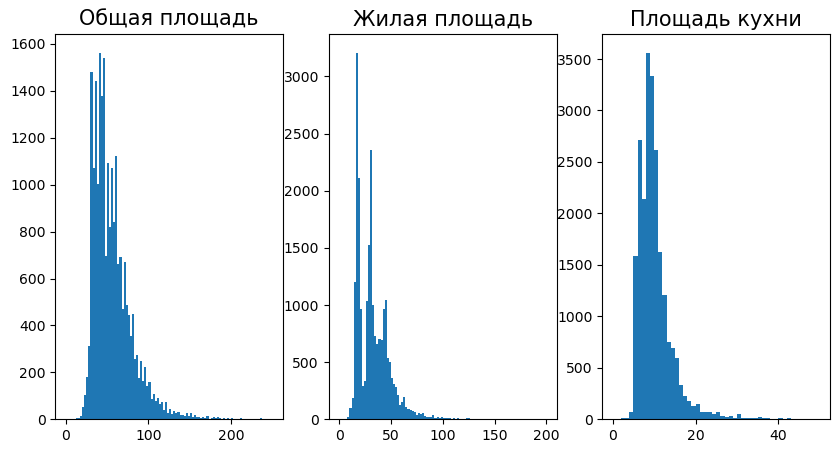

In [25]:
fig, axs = plt.subplots(1, 3)

axs[0].hist(data['total_area'], bins=100, range=(0, 250))
axs[0].set_title('Общая площадь', fontsize = 15)


axs[1].hist(data['living_area'], bins=100, range=(0, 200))
axs[1].set_title('Жилая площадь', fontsize = 15) 

axs[2].hist(data['kitchen_area'], bins=50, range=(0, 50))
axs[2].set_title('Площадь кухни', fontsize = 15)

plt.show()

In [26]:
print(data['total_area'].describe())
print()

print(data['living_area'].describe())
print()

print(data['kitchen_area'].describe())

count   22,756.00
mean        56.66
std         24.60
min         12.00
25%         40.00
50%         51.00
75%         67.00
max        320.00
Name: total_area, dtype: float64

count   22,756.00
mean        32.45
std         16.60
min          2.00
25%         18.16
50%         30.00
75%         41.60
max        199.00
Name: living_area, dtype: float64

count   22,566.00
mean        10.03
std          4.52
min          1.30
25%          7.20
50%          9.04
75%         11.10
max        100.70
Name: kitchen_area, dtype: float64


На всех трех таблицах есть убывающие "хвосты", которые можно удалить из данных, так как, судя по графикам, их очень мало. Однако, чтобы случайно не удалить слишком много, стоит посчитать сколько строк уйдет из датафрейма.

In [27]:
data.loc[(data['total_area'] < 15) | (data['total_area'] > 200), 
         'total_area'].count() + data.loc[(data['living_area'] < 10) | (data['living_area'] > 130), 
        'living_area'].count() + data.loc[(data['kitchen_area'] < 3) | (data['kitchen_area'] > 40),
        'kitchen_area'].count()

171

Как оказалось, совсем немного. Можно от них избавляться.

In [28]:
data = data.query('15 < total_area < 200')
data = data.query('10 < living_area < 130')
data = data.query('3 < kitchen_area < 40')
data = data.reset_index(drop=True)

Итак, все дубликаты, аномалии, редкие и выбивающиеся значения были устранены и отфильтрованы. Такие данные покажут более точную информацию и с ними будет проще работать, поэтому с ними можно переходить к анализу.

### Добавление новых столбцов

Для более удобной работы с данными добавим столбцы со следующей информацией:
* Цена одного квадратого метра;
* День недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
* Месяц публикации объявления;
* Год публикации объявления;
* Тип этажа квартиры (значения — «первый», «последний», «другой»);
* Расстояние до центра города в километрах.

In [29]:
# Добавляем столбец с ценой за метр
data['meter_price'] = data['last_price'] / data['total_area']

# Добавляем столбец с днем недели публикации
data['weekday_exposition'] = data['first_day_exposition'].dt.day_name()

# Добавляем столбец с месяцем публикации
data['month_exposition'] = data['first_day_exposition'].dt.month_name()

# Добавляем столбец с годом публикации
data['year_exposition'] = data['first_day_exposition'].dt.year

# Для определения типа этажа необходимо написать функцию
def type_of_floor(data):
    floor = data['floor']
    floors_total = data['floors_total']
    if floor == floors_total:
        return 'последний'
    elif floor == 1:
        return 'первый'
    else:
        return 'другой'
    
# Добавляем столбец с типом этажа
data['floor_type'] = data.apply(type_of_floor, axis=1)

# Добавляем столбец с расстоянием до центра  
data['km_to_city_center'] = (data['cityCenters_nearest'] / 1000).round()

В датафрейм были добавлены новые столбцы:
- `meter_price` - цена за квадратный метр;
- `weekday_exposition` - день недели публикации объявления ;
- `month_exposition` - месяц публикации объявления;
- `year_exposition` - год публикации объявления;
- `floor_type` - тип этажа (первый, другой, последний);
- `km_to_city_center` - расстояние до центра в киллометрах.

### Вывод

In [30]:
display(data.head())
data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,weekday_exposition,month_exposition,year_exposition,floor_type,km_to_city_center
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16,51.00,8,True,...,482.00,2.00,755.00,NaN,"120,370.37",Thursday,March,2019,другой,16.00
1,7,"3,350,000.00",40.40,2018-12-04,1,2.65,11,18.60,1,True,...,NaN,0.00,NaN,81.00,"82,920.79",Tuesday,December,2018,первый,19.00
2,10,"5,196,000.00",56.00,2015-08-20,2,2.65,5,34.30,4,True,...,90.00,2.00,574.00,558.00,"92,785.71",Thursday,August,2015,другой,14.00
3,10,"2,890,000.00",30.40,2018-09-10,1,2.65,12,14.40,5,True,...,NaN,NaN,NaN,55.00,"95,065.79",Monday,September,2018,другой,NaN
4,6,"3,700,000.00",37.30,2017-11-02,1,2.65,26,10.60,6,True,...,NaN,0.00,NaN,155.00,"99,195.71",Thursday,November,2017,другой,19.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22385 entries, 0 to 22384
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22385 non-null  int64         
 1   last_price            22385 non-null  float64       
 2   total_area            22385 non-null  float64       
 3   first_day_exposition  22385 non-null  datetime64[ns]
 4   rooms                 22385 non-null  int64         
 5   ceiling_height        22385 non-null  float64       
 6   floors_total          22385 non-null  int32         
 7   living_area           22385 non-null  float64       
 8   floor                 22385 non-null  int64         
 9   is_apartment          22385 non-null  bool          
 10  studio                22385 non-null  bool          
 11  open_plan             22385 non-null  bool          
 12  kitchen_area          22385 non-null  float64       
 13  balcony         

**По проведенной предобработке можно сделать небольшой промежуточный вывод:**
* Заполнены пропуски с высотой потолков, площадью и наличию балконов. Пропуски с картографическими данными заполнить не удалось;
* Изменены типы данных столбцов;
* Обработаны неявные дубликаты в названиях населенных пунктов;
* Устранены аномальные значения в столбцах с числовыми данными;
* Добавлены новые столбцы:
    - `meter_price` - цена за квадратный метр;
    - `weekday_exposition` - день недели публикации объявления ;
    - `month_exposition` - месяц публикации объявления;
    - `year_exposition` - год публикации объявления;
    - `floor_type` - тип этажа (первый, другой, последний);
    - `km_to_city_center` - расстояние до центра в киллометрах.

[Начало страницы](#Исследование-объявлений-о-продаже-квартир)

## Исследовательский анализ данных

В данном разделе нам предстоит изучить параметры представленных квартир, узнать, как быстро продаются квартиры, а также рассмотреть влияние различных факторов на стоимость квартиры.

### Описание параметров квартир

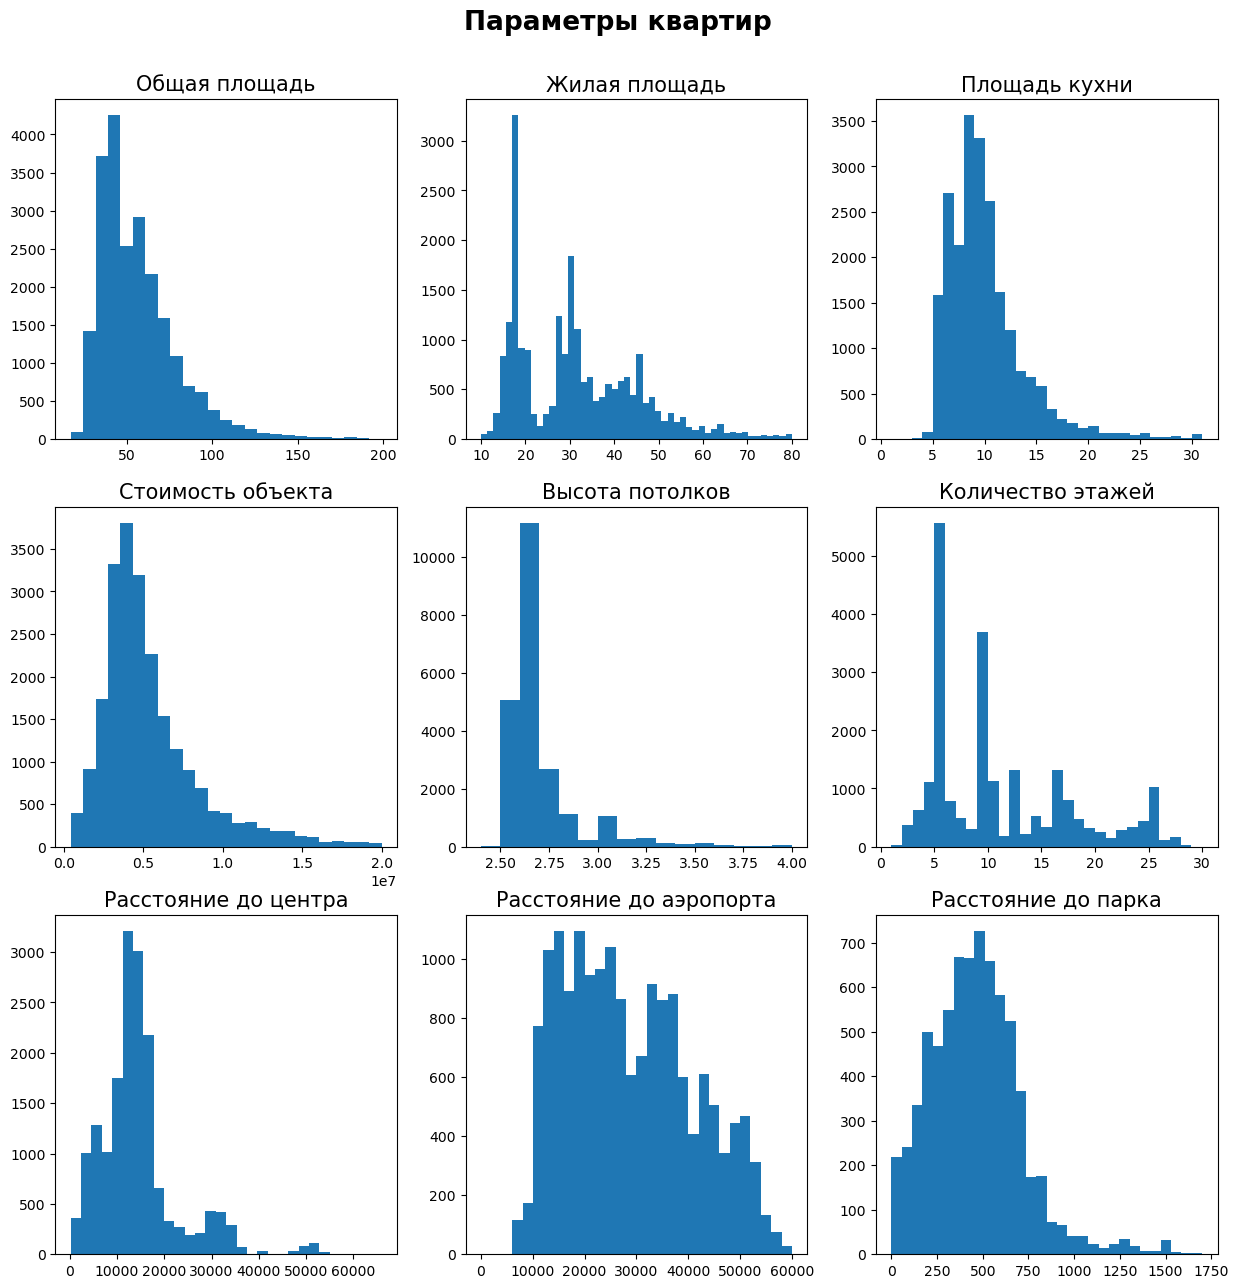

In [31]:
fig, axs = plt.subplots(3, 3)

plt.suptitle('Параметры квартир', x=0.5, y=0.94, fontsize=19, fontweight='700') 

fig.set_figheight(15)
fig.set_figwidth(15)

axs[0, 0].hist(data['total_area'], bins=25)
axs[0, 0].set_title('Общая площадь', fontsize = 15)

axs[0, 1].hist(data['living_area'], bins=50, range=(10, 80))
axs[0, 1].set_title('Жилая площадь', fontsize = 15)

axs[0, 2].hist(data['kitchen_area'], bins=30, range=(1, 31))
axs[0, 2].set_title('Площадь кухни', fontsize = 15)

axs[1, 0].hist(data['last_price'], bins=25)
axs[1, 0].set_title('Стоимость объекта', fontsize = 15)

axs[1, 1].hist(data['ceiling_height'], bins=16, range=(2.40, 4))
axs[1, 1].set_title('Высота потолков', fontsize = 15)

axs[1, 2].hist(data['floors_total'], bins=29, range=(1, 30))
axs[1, 2].set_title('Количество этажей', fontsize = 15)

axs[2, 0].hist(data['cityCenters_nearest'], bins= 30)
axs[2, 0].set_title('Расстояние до центра', fontsize = 15)

axs[2, 1].hist(data['airports_nearest'], bins= 30, range=(0, 60000))
axs[2, 1].set_title('Расстояние до аэропорта', fontsize = 15)

axs[2, 2].hist(data['parks_nearest'], bins=30, range=(0, 1700))
axs[2, 2].set_title('Расстояние до парка', fontsize = 15)

plt.show()

**Общая площадь:** По графику видно, что площадь основной части квартир варьируется от 30 до 63 квадратных метров. Есть квартиры и с большой площадью, от 100 до 125 метров. Квартир с площадью от 125 метров очень мало, квартиры от 150 метров уже практически не встречаются.

**Жилая площадь:** На графике присутствует несколько пиков. Самый первый и объемный пик приходится на 15-21 метров жилой площади. Второй, менее объемный пик пришелся на метраж от 27 до 35 метров. Далее жилая площадь в объявлениях идет на убыль и квартир с жилой площадью более 60 метров также довольно мало.

**Площадь кухни:** В основном площадь кухни в квартирах встречается в диапозоне от 5 до 13 метров. Кухонь с площадью от 21 метра практически нет. Учитывая общую, жилую и площадь кухни, данные графики выглядят правдоподобно.

**Цена квартиры:** Средний ценник на квартиры в Ленинградской области - от 2-х до 7-ми миллионов рублей. Также есть более дорогие квартиры, от 10-15 млн. рублей. Можно предположить, что это квартиры с большей площадью и количеством комнат.

**Количество комнат:** В большинстве случаев встречаются одно-, двух-, и трехкомнатные квартиры. Есть несколько объявлений с четырьмя комнатами, но большее количество комнат в квартирах можно назвать редкостью.

**Высота потолков:** Высота потолков в квартирах составляет в среднем от 2,5 до 2,8 метров. Судя по графику квартир с потолками от 3,1 метра, опять же, крайне мало, поэтому данные с полотками от 4-х метров были отброшены не зря.

**Расстояние до центра:** Большинство квартир находится в пределах до 20 км до центра города. Среди объявлений попадаются квартиры с удаленностью от центра 50 и более километров. Вероятно, эти квартиры находятся в деревнях или селах, а центром был указан ближайший к этому селу город.

**Расстояние до аэропорта:** Здесь разброс расстояния обширнее. В основном квартиры находятся на расстоянии от 10 до 40 км. от ближайшего аэропорта. Есть квартиры, от которых добираться до аэропорта нужно 60 км. Более далекие квартиры уже являются редкостью.

**Ближайшие парки:** Почти у всех домов, в которых расположены квартиры из объявлений, неподалеку имеются парки. В большинстве случаев парки находятся не дальше, чем в 750 метрах от дома.

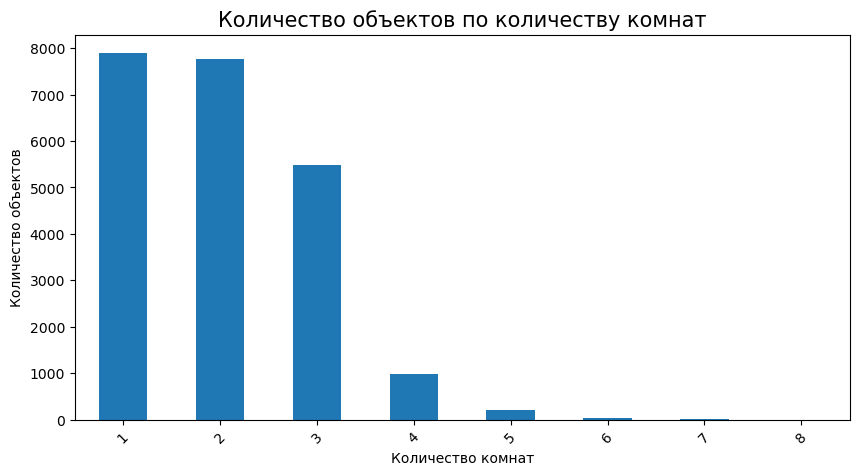

In [32]:
data.pivot_table(index='rooms', values='last_price', aggfunc='count').plot(kind='bar', legend='')
plt.title('Количество объектов по количеству комнат', fontsize = 15)
plt.ylabel('Количество объектов')
plt.xlabel('Количество комнат')
plt.xticks(rotation=45)
plt.show()

**Количество комнат:** В большинстве случаев встречаются одно-, двух-, и трехкомнатные квартиры. Есть несколько объявлений с четырьмя комнатами, но большее количество комнат в квартирах можно назвать редкостью.

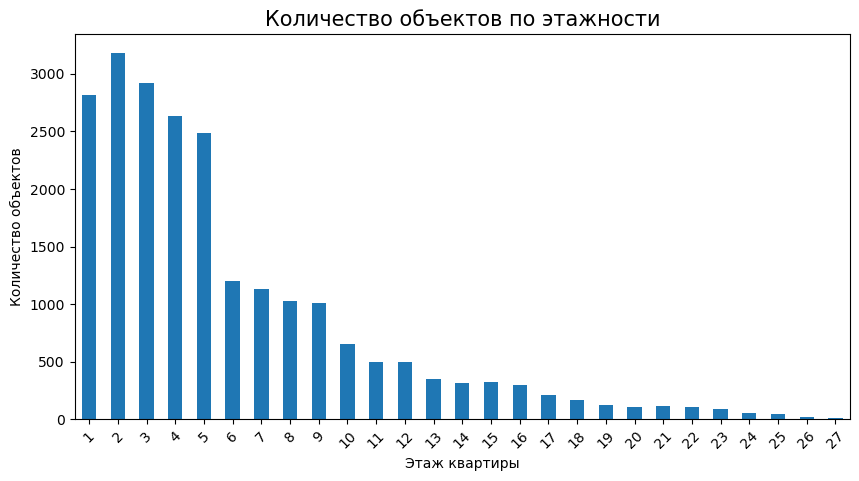

In [33]:
data.pivot_table(index='floor', values='last_price', aggfunc='count').plot(kind='bar', legend='')
plt.title('Количество объектов по этажности', fontsize = 15)
plt.ylabel('Количество объектов')
plt.xlabel('Этаж квартиры')
plt.xticks(rotation=45)
plt.show()

**Этаж квартиры:** Основная масса квартир находится на 1-5 этажах. Также, с 6 по 9 находится примерно по тысяче квартир из объявлений. Дальше этажность квартир значительно уменьшается.

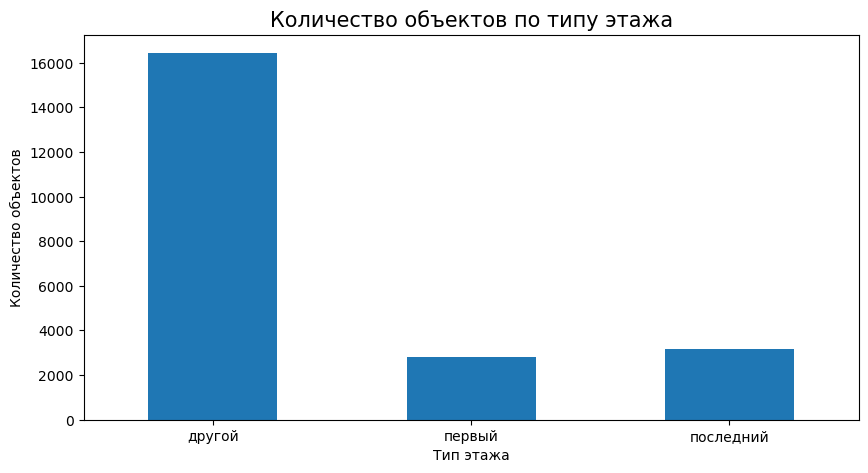

In [34]:
data.pivot_table(index='floor_type', values='last_price', aggfunc='count').plot(kind='bar', legend='')
plt.title('Количество объектов по типу этажа', fontsize = 15)
plt.ylabel('Количество объектов')
plt.xlabel('Тип этажа')
plt.xticks(rotation=0)
plt.show()

**Тип этажа квартиры:** Основное количество квартир находится в промежутке между вторым и предпоследним этажом дома, что вполне логично. Квартир на последнем этаже чуть больше, чем на первом, но в среднем и тех, и тех, около 3-х тысяч.


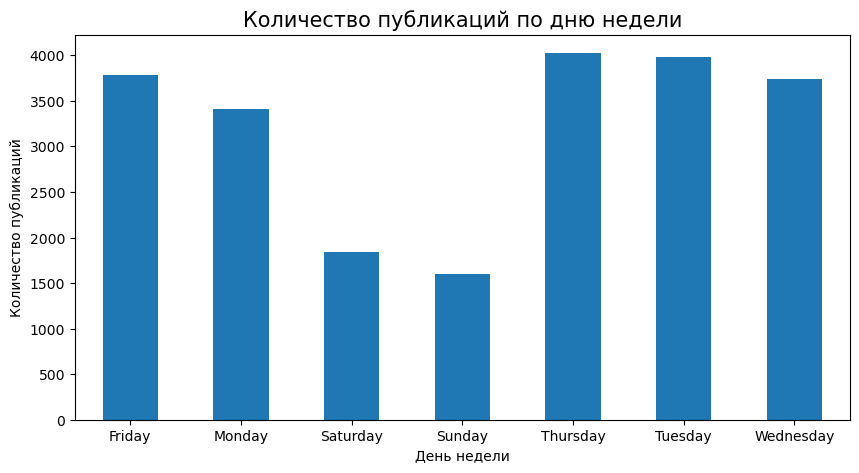

In [35]:
data.pivot_table(index='weekday_exposition', values='last_price', aggfunc='count').plot(kind='bar', legend='')
plt.title('Количество публикаций по дню недели', fontsize = 15)
plt.ylabel('Количество публикаций')
plt.xlabel('День недели')
plt.xticks(rotation=0)
plt.show()

**День публикации объявления:** На графике видно 2 провала, по сравнению со всеми остальными днями недели. Эти провалы - это суббота и воскресенье, в выходные люди более, чем в 2 раза реже выкладывают объявления, чем в будние дни.

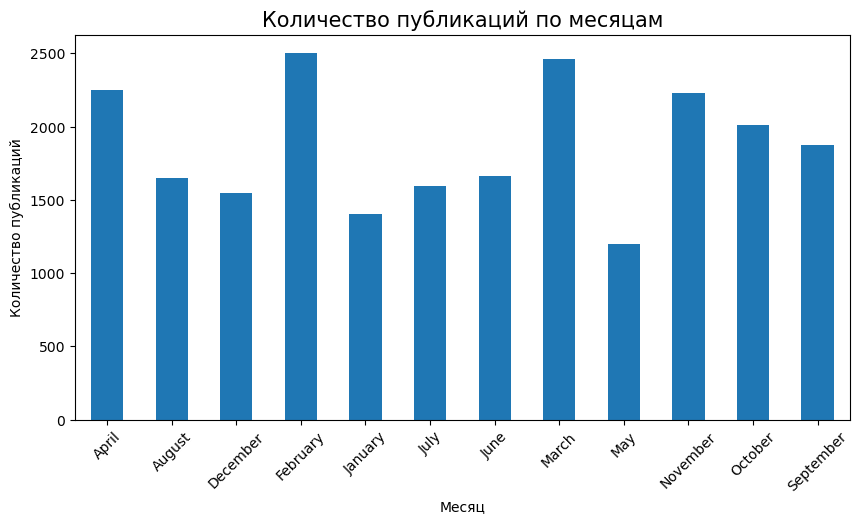

In [36]:
data.pivot_table(index='month_exposition', values='last_price', aggfunc='count').plot(kind='bar', legend='')
plt.title('Количество публикаций по месяцам', fontsize = 15)
plt.ylabel('Количество публикаций')
plt.xlabel('Месяц')
plt.xticks(rotation=45)
plt.show()

**Месяц публикации объявления:** С начала года резкий рост количества объявлений приходится на февраль. К апрелю количество объявлений снижается, в мае снизилось вдвое. Все лето количество публикаций находилось примерно на одном уровне, чуть больше 1500 объявлений в месяц, а осенью, до декабря, снова виден рост количества объявлений.

### Скорость продажи квартир

Рассмотрим, как быстро в среднем продаются квартиры.

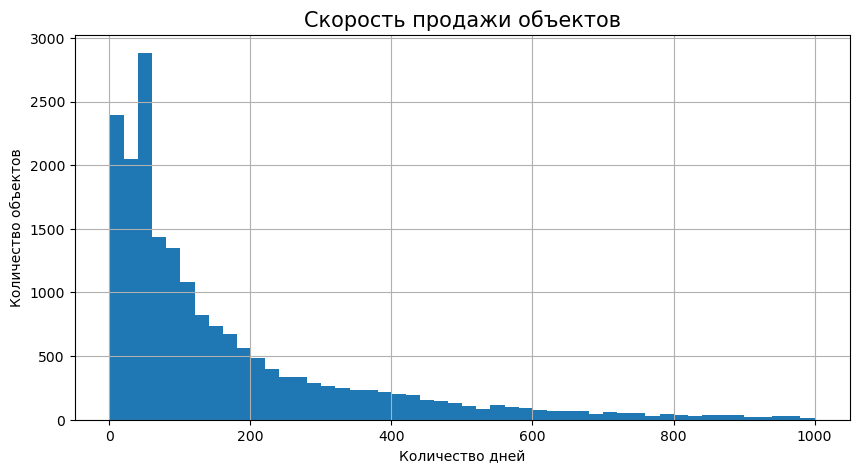

In [37]:
data.hist('days_exposition', bins=50, range=(1, 1000))
plt.title('Скорость продажи объектов', fontsize = 15)
plt.ylabel('Количество объектов')
plt.xlabel('Количество дней')
plt.show()

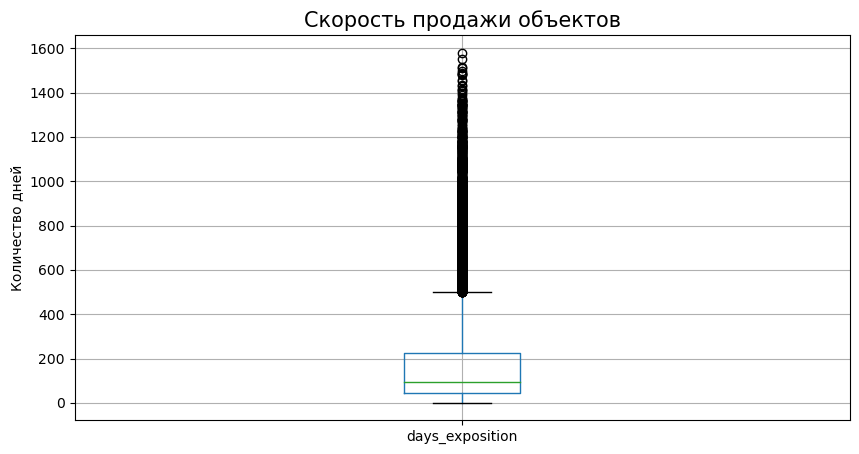

In [38]:
data.boxplot(column='days_exposition')
plt.title('Скорость продажи объектов', fontsize = 15)
plt.ylabel('Количество дней')
plt.show()

In [39]:
data['days_exposition'].describe()

count   19,479.00
mean       178.17
std        216.60
min          1.00
25%         45.00
50%         94.00
75%        227.00
max      1,580.00
Name: days_exposition, dtype: float64

Судя по гистограмме, большинство квартир успевают продавать менее, чем за 170 дней. Среднее количество дней по продаже квартиры - 178, медианное - 94. На диаграмме размаха видно огромное количество выбросов после отметки в 500 дней. Видны единичные значения у верхней границы графика в 1600 дней. Это действительно подозрительная цифра, либо цена квартиры была слишком завышена, либо произошла ошибка в данных. Быстрыми можно назвать продажи квартир за 45 и менее дней, а довольно долгими более, чем 227 дней.

### Взаимосвязь между стоимостью квартиры и ее параметрами

Рассмотрим, какова взаимосвязь между стоимостью квартиры и ее различными параметрами, рассчитаем коэффициенты корреляции.

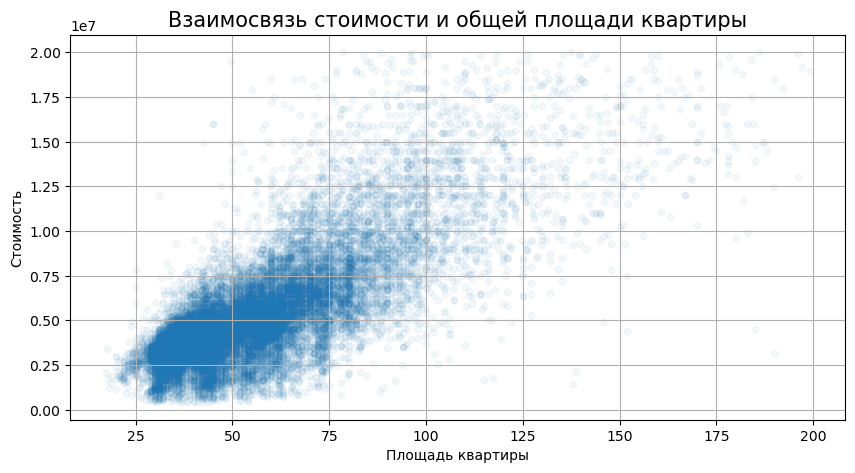

Корреляция равна 0.7684930806419459


In [40]:
data.plot(x='total_area', y='last_price', kind='scatter', grid=True,
          alpha=0.05, xlabel='Площадь квартиры', ylabel='Стоимость')
plt.title('Взаимосвязь стоимости и общей площади квартиры', fontsize = 15)
plt.show()

print('Корреляция равна', data['last_price'].corr(data['total_area']))

На графике можно увидеть положительную корреляцию, это гововорит о том, что существует прямая взаимосвязь между площадью квартиры и ее цены: чем больше одно, тем больше другое. На графике присутствуют и выбросы, например, видно квартиру площадью около 190 метров и стоимостью в 3 миллиона, однако для основной доли квартир эта взамосвязь присутствует, что подтверждает и коэффициент корреляции. Коэффициент, равный 0.77, означает выраженную положительную корреляцию, в которой также остаются объекты, не подверженные этой корреляции.

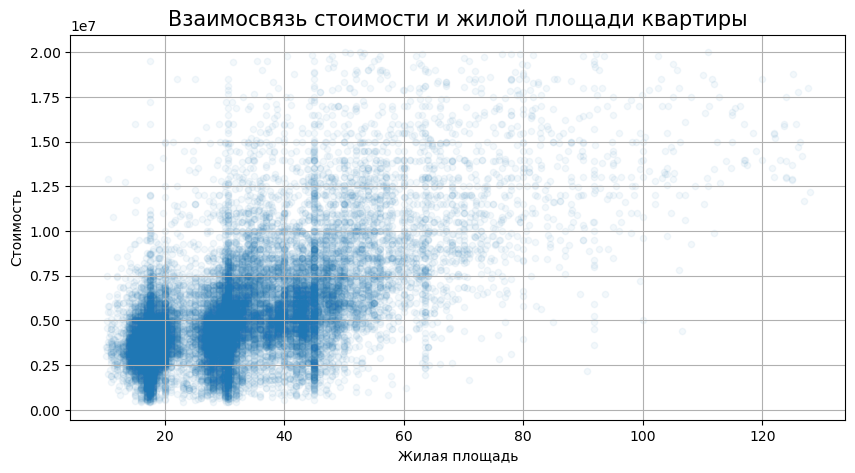

Корреляция равна 0.64


In [41]:
data.plot(x='living_area', y='last_price', kind='scatter', grid=True,
          alpha=0.05, xlabel='Жилая площадь', ylabel='Стоимость')
plt.title('Взаимосвязь стоимости и жилой площади квартиры', fontsize = 15)
plt.show()

print('Корреляция равна', round(data['last_price'].corr(data['living_area']), 2))

На данном графике также можно наблюдать положительную взаимосвязь между стоимостью и жилой площадью. Однако в данном случае коэффициент равен 0.64, что говорит о том, что стоимость реже зависит от жилой площади, нежели чем от общей.

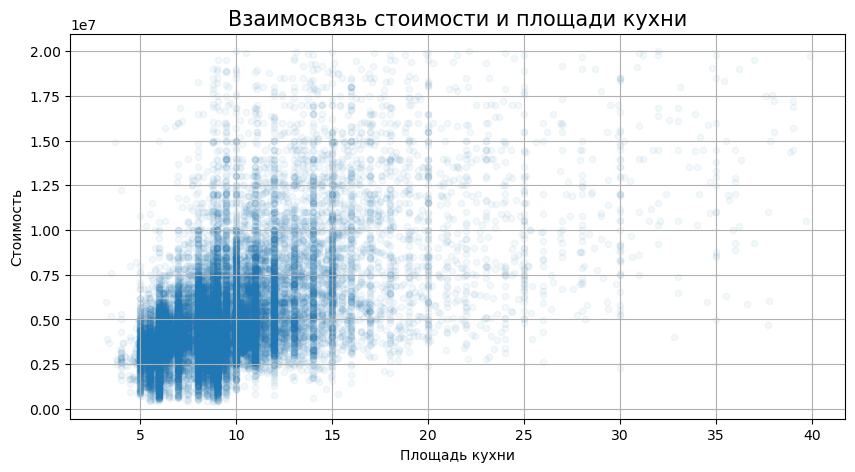

Корреляция равна 0.55


In [42]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', grid=True,
          alpha=0.05, xlabel='Площадь кухни', ylabel='Стоимость')
plt.title('Взаимосвязь стоимости и площади кухни', fontsize = 15)
plt.show()

print('Корреляция равна', round(data['last_price'].corr(data['kitchen_area']), 2))

На графике взаимосвязи между стоимостью и площадью кухни можно заметить отчетливую корреляцию до значения площади кухни в 9-10 метров. Далее точки расположены более хаотично, в связи с чем и снизился коэффициент до 0.55: факторы все еще взаимосвязаны, но не всегда.

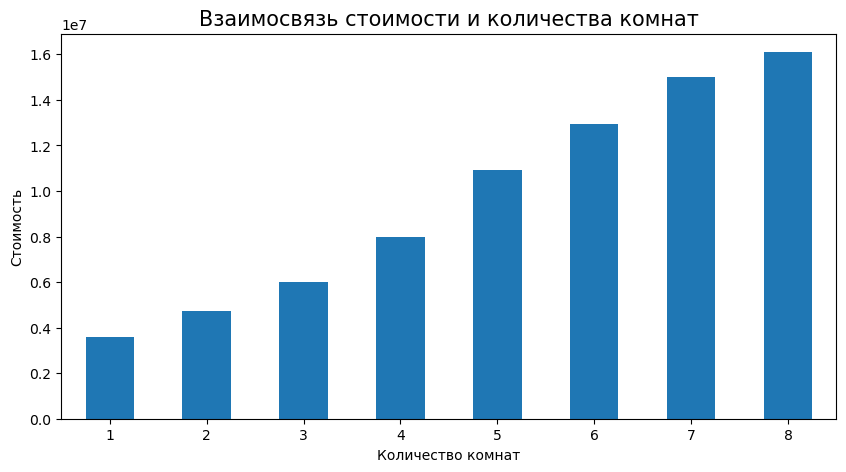

In [43]:
data.pivot_table(index='rooms', values='last_price', aggfunc='median'
                ).plot(kind='bar', xlabel='Количество комнат', ylabel='Стоимость',
                       legend='')
plt.title('Взаимосвязь стоимости и количества комнат', fontsize = 15)
plt.xticks(rotation=0)
plt.show()

График взаимосвязи количества комнат и стоимости квартиры наглядно показывает, что с увеличением числа комнат, увеличивается и стоимость. В целом, этого и следовало ожидать, поскольку зачастую чем больше комнат, тем больше площадь квартиры, а она, как мы уже выяснили, напрямую влияет на цену квартиры.

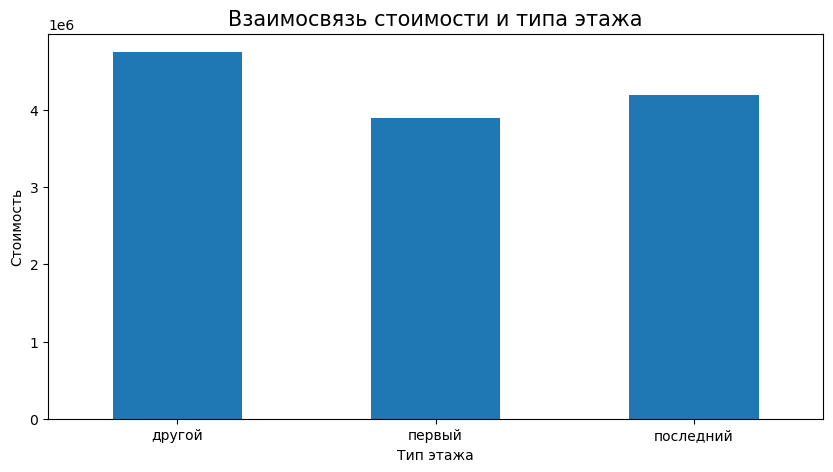

In [44]:
data.pivot_table(index='floor_type', values='last_price', aggfunc='median'
                ).plot(kind='bar', xlabel='Тип этажа', ylabel='Стоимость',
                       legend='')
plt.title('Взаимосвязь стоимости и типа этажа', fontsize = 15)
plt.xticks(rotation=0)
plt.show()

Судя по графику, квартиры на первом этаже всегда дешевле, чем остальные. Разница между стоимостью квартир на 1 и на последнем этаже не очень большая, а вот квартиры посередине уже стоят дороже.

Далее рассмотрим, влияет ли на стоимость день недели, месяц, и год, когда было выложено объявление о продаже.

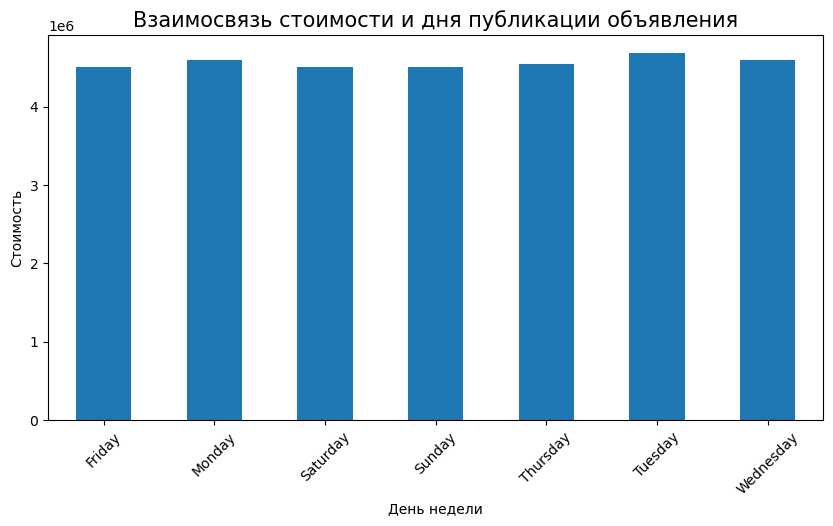

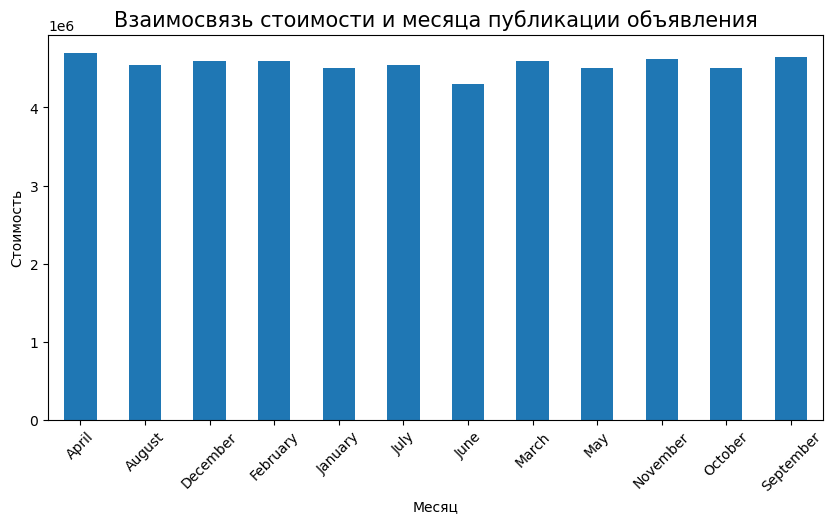

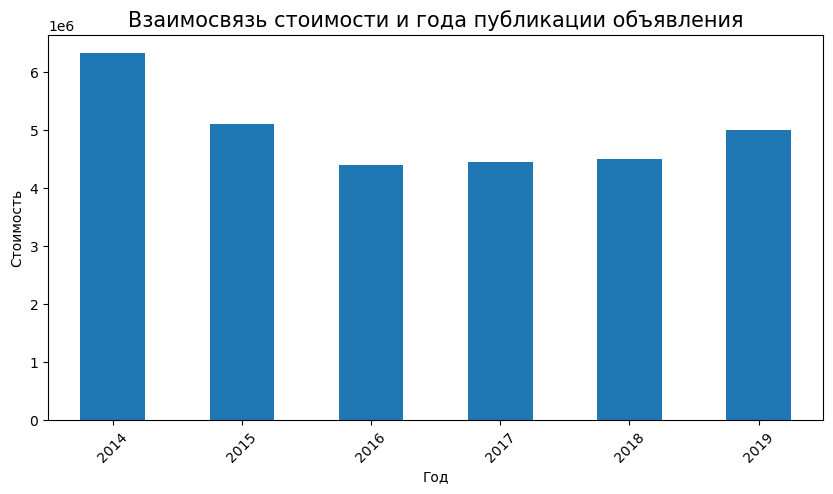

In [45]:
data.pivot_table(index='weekday_exposition', values='last_price', aggfunc='median'
                ).plot(kind='bar', xlabel='День недели', ylabel='Стоимость', legend='')
plt.title('Взаимосвязь стоимости и дня публикации объявления', fontsize = 15)
plt.xticks(rotation=45)
plt.show()

data.pivot_table(index='month_exposition', values='last_price', aggfunc='median'
                ).plot(kind='bar', xlabel='Месяц', ylabel='Стоимость', legend='')
plt.title('Взаимосвязь стоимости и месяца публикации объявления', fontsize = 15)
plt.xticks(rotation=45)
plt.show()

data.pivot_table(index='year_exposition', values='last_price', aggfunc='median'
                ).plot(kind='bar', xlabel='Год', ylabel='Стоимость', legend='')
plt.title('Взаимосвязь стоимости и года публикации объявления', fontsize = 15)
plt.xticks(rotation=45)
plt.show()

По первым двум графикам видно, что никакой взаимосвязи между ценой и днем недели/месяцем, когда было опубликовано объявление, нет. На втором графике виден небольшой обрыв в Июне месяце, но из этого нельзя сделать вывод, что квартиры, опубликованные в Июне, будут стоить дешевле, чем опубликованные в Июле. Вероятно, здесь повлиял третий фактор.

Ситуация меняется если рассматривать среднюю стоимость квартир по годам. В 2014 была самая высокая стоимость квартир, после чего она начала падать. С 2016 по 2018 год цены на квартиры оставались примерно на одном уровне, однако с 2019 года квартиры снова начали расти в цене. Здесь, вероятнее всего, основную роль играют геополитические и экономические факторы. В 2014 году отмечался ажиотаж на покупку квартир, вследствие чего повышались цены на них. К 2015 году спрос начал спадать, соответственно уменьшились и цены на квартиры.

### Расчет средних цен за метр в разных населенных пунктах

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [46]:
# Создаем список из 10 самых распространенных населенных пунктах
data_top10 = data['locality_name'].value_counts().head(10)

# Отбираем данные, где встречаются населенные пункты из спика
top10_meter_price = data.query('locality_name in @data_top10.index')

# Считаем среднюю цену за метр
top10_meter_price = top10_meter_price.pivot_table(index='locality_name',values='meter_price', aggfunc='mean'
                             ).sort_values('meter_price', ascending=False).reset_index()

top10_meter_price = top10_meter_price.rename(columns={'locality_name': 'Населенный пункт', 'meter_price': 'Цена за метр'})
top10_meter_price

,Населенный пункт,Цена за метр
0,Санкт-Петербург,"108,420.93"
1,Пушкин,"101,799.99"
2,Кудрово,"95,083.28"
3,Парголово,"90,448.42"
4,Мурино,"85,265.87"
5,Шушары,"78,303.21"
6,Колпино,"75,352.48"
7,Гатчина,"68,746.15"
8,Всеволожск,"67,217.77"
9,Выборг,"58,191.17"


Наибольшая стоимость за квадратный метр в центре Ленинградской области, Санкт-Петербурге. Далее по убыванию идут близлежащие населенные пункты. Самая низкая стоимоть за метр среди данной десяти в городе Выборг.

### Зависимость стоимости квартиры от удаленности к центру в Санкт-Петербурге

Теперь выделим квартиры в Санкт-Петербурге и вычислим их среднюю стоимость на разном удалении от центра, учитывая каждый километр.

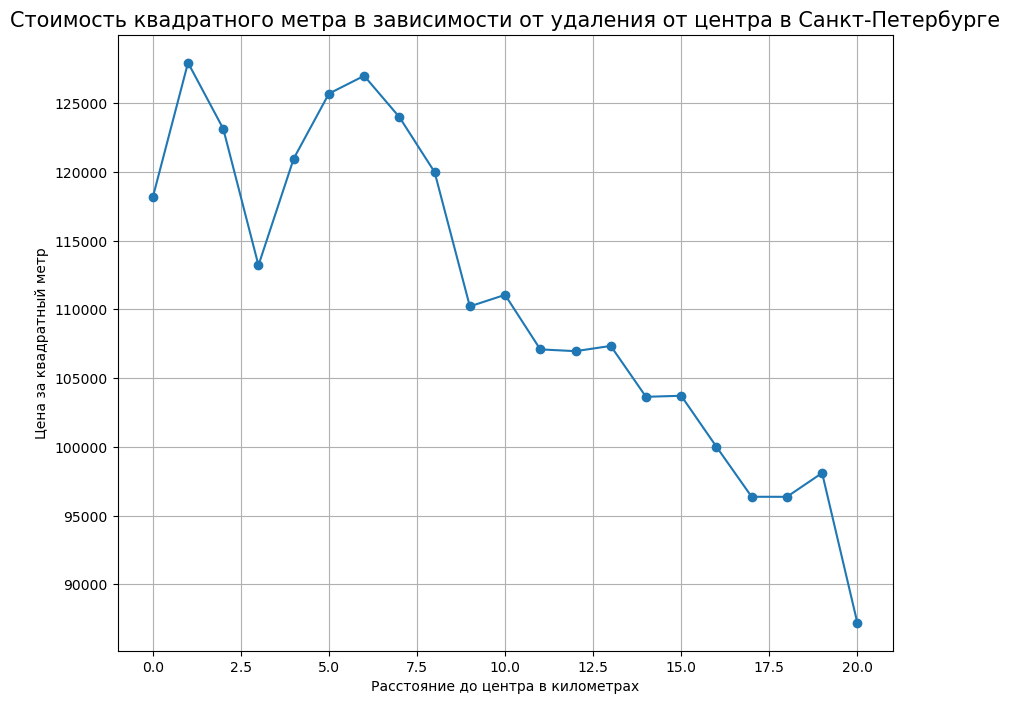

In [47]:
# Выделяем квартиры в Санкт-Петербурге, не дальше 20 км. от центра
spb_data = data.query('locality_name == "Санкт-Петербург" and km_to_city_center <= 20')

spb_data.pivot_table(index='km_to_city_center',
                     values='meter_price', aggfunc='mean').plot(figsize=(10,8),
                     grid=True, style='o-', legend='')
plt.title('Стоимость квадратного метра в зависимости от удаления от центра в Санкт-Петербурге', fontsize = 15)
plt.xlabel('Расстояние до центра в километрах')
plt.ylabel('Цена за квадратный метр')
plt.show()

Исходя из графика, стоимость квартиры в центре может колебаться от 114 до 127 тясч за кватратный метр. Однако, с 8-го километра и чем дальше от центра, тем сильнее снижается цена. В 20-ти киллометрах от центра цена за квадратный метр квартиры составляет менeе 90 тысяч рублей.

[Начало страницы](#Исследование-объявлений-о-продаже-квартир)

## Общий вывод

Проанализировав датафрейм, можно сделать выводы по нескольким пунктам:

**Параметры квартир:**
* Большинство квартир имеют общую площадь от 30 до 63 квадратных метров, из которых 15-21 метров пришлось на жилую площадь, а от 5 до 13 метров на кухню.
* Большинство квартир имеют 1, 2 или 3 комнаты.
* Средняя высота потолков квартир составляет от 2.5 до 2.8 метров.
* Основное количество квартир расположены на 1-5 этажах.

**Скорость продажи квартир:**
* В среднем квартиры продают за 94 дня.
* Существуют квартиры, которые продавались больше 4-х лет.
* Также есть квартиры, проданные за сутки.

**Взаимосвязь стоимости квартиры и ее параметрами:**
* Наибольшее влияние на цену оказывает общая площадь квартиры.
* Также, на примере Санкт-Петербурга, можно сделать вывод о том, что удаленость от центра тоже сильно влияет на стоимость квартиры.
* Первый этаж - самый дешевый.

**Цены в разных населенных пунктах:**
* Самые дорогие квартиры находятся в Санкт-Петербурге.
* Также в десятку лидеров по стоимости квартир вошли близлежащие к Питеру населенные пункты.
* Самые дешевые квартиры из данной выборки оказались в Выборге.

[Начало страницы](#Исследование-объявлений-о-продаже-квартир)